Initial data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None
Missing Value:
 gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
wri

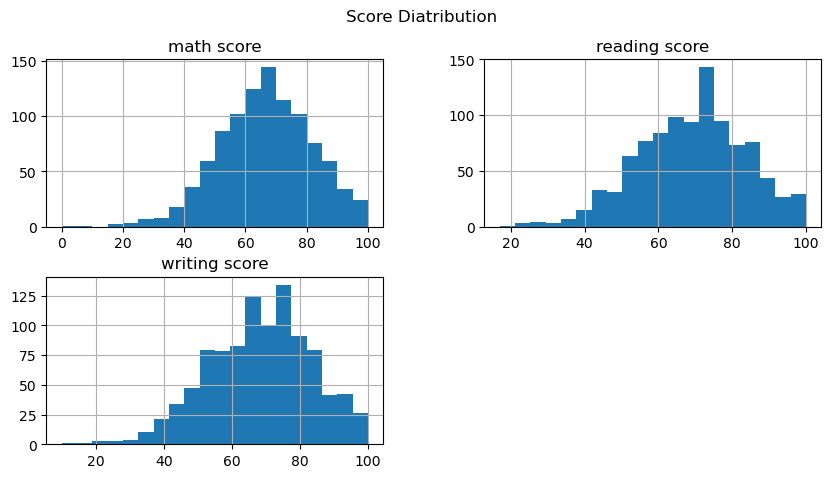

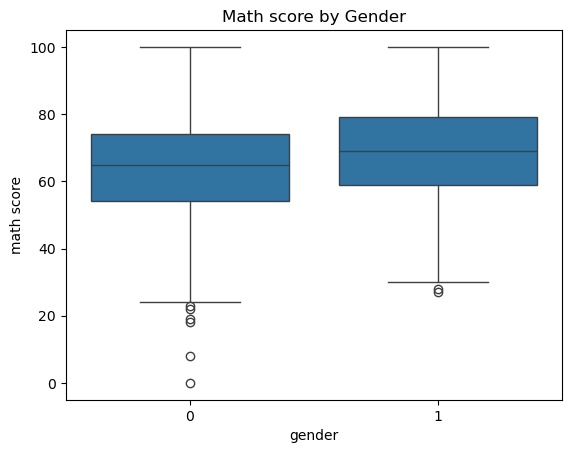

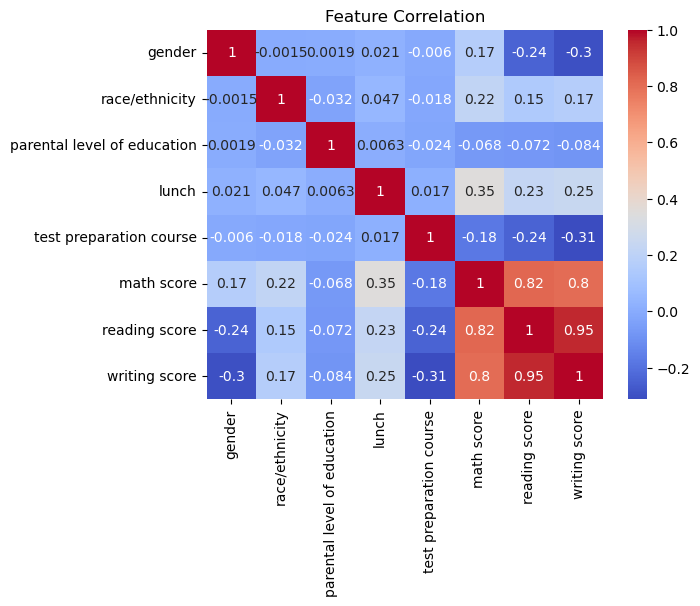

Logistic Regression Result:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00       173

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

Confusion Matrix:
 [[ 27   0]
 [  0 173]]
KNN Result:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        27
           1       1.00      0.99      1.00       173

    accuracy                           0.99       200
   macro avg       0.98      1.00      0.99       200
weighted avg       1.00      0.99      1.00       200

Confusion Matrix:
 [[ 27   0]
 [  1 172]]


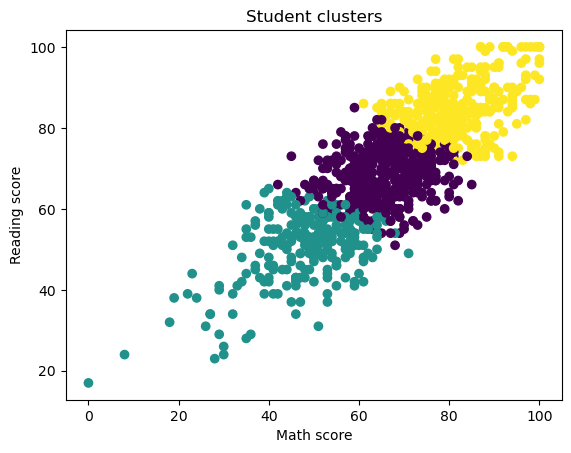

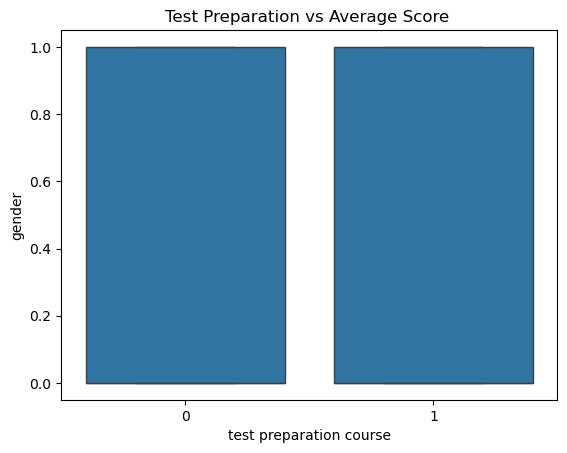

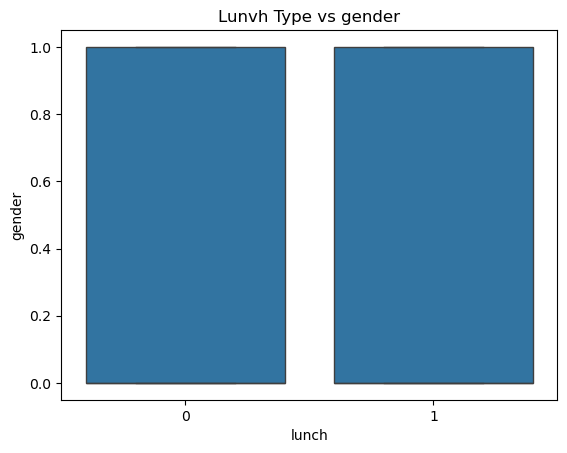

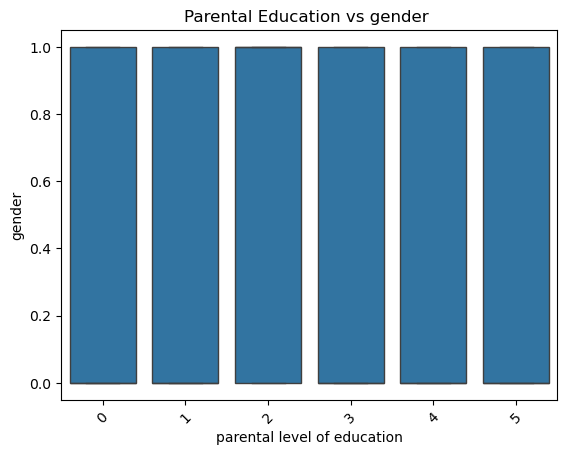

In [51]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.cluster import KMeans

# Load dataset
df = pd.read_csv("Downloads/StudentsPerformance.csv")

# Data Preprocessing
print("Initial data Info:")
print(df.info())
print("Missing Value:\n", df.isnull().sum())
print("Duplicate Rows:",df.duplicated().sum())

# Label Encoding
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['lunch'] = le.fit_transform(df['lunch'])
df['test preparation course'] = le.fit_transform(df['test preparation course'])
df['parental level of education'] = le.fit_transform(df['parental level of education'])
df['race/ethnicity'] = le.fit_transform(df['race/ethnicity'])

# Exploratory Data Analysis
# Histograms
df[['math score','reading score','writing score']].hist(bins=20,figsize=(10,5))
plt.suptitle("Score Diatribution")
plt.show()

# Boxplot by gender
sns.boxplot(x='gender', y='math score', data=df)
plt.title("Math score by Gender")
plt.show()

# correlation Heatmap
sns.heatmap(df.corr(), annot=True,cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()

# Feature Engineering
df['average_score'] = df[['math score','reading score','writing score']].mean(axis=1)
df['result'] = df['average_score'].apply(lambda x: 1 if x >= 50 else 0)


# Classification - Logistic Regression and KNN
X = df.drop(['average_score','result'], axis=1)
y = df['result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# K_Nearest Regression 
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Evaluation 
print("Logistic Regression Result:")
print(classification_report(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))

print("KNN Result:")
print(classification_report(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))

# Clustering with KMeans
X_cluster = df[['math score', 'reading score', 'writing score']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
df['cluster'] = clusters

# Cluster Visualization
plt.scatter(df['math score'], df['reading score'], c=clusters, cmap= 'viridis' )
plt.xlabel('Math score')
plt.ylabel('Reading score')
plt.title('Student clusters')
plt.show()
      
# Bonus Analyses
# Test prep vs average score 
sns.boxplot(x='test preparation course', y='gender', data=df)
plt.title("Test Preparation vs Average Score ")
plt.show()

# Lunch type vs average score
sns.boxplot(x='lunch',y='gender', data=df)
plt.title("Lunvh Type vs gender")
plt.show()

# Parental education vs Average score
sns.boxplot(x='parental level of education', y='gender', data=df)
plt.title("Parental Education vs gender ")
plt.xticks(rotation=45)
plt.show()